# KMeans clustering, dimension reduction with PCA: fish measurements

In [1]:
import pandas as pd

samples = pd.read_csv('fish.csv', header=None, index_col=0)

samples.head()

,1,2,3,4,5,6
0,,,,,,
Bream,242.0,23.2,25.4,30.0,38.4,13.4
Bream,290.0,24.0,26.3,31.2,40.0,13.8
Bream,340.0,23.9,26.5,31.1,39.8,15.1
Bream,363.0,26.3,29.0,33.5,38.0,13.3
Bream,430.0,26.5,29.0,34.0,36.6,15.1


In [2]:
# Perform the necessary imports
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Create scaler: scaler
scaler = StandardScaler()

# Create KMeans instance: kmeans
kmeans = KMeans(n_clusters=4)

# Create pipeline: pipeline
pipeline = make_pipeline(scaler, kmeans)

In [3]:
# Fit the pipeline to samples
pipeline.fit(samples)

# Calculate the cluster labels: labels
labels = pipeline.predict(samples)

# Create a DataFrame with labels and species as columns: df
df = pd.DataFrame({'labels': labels, 'species': samples.index})

# Create crosstab: ct
ct = pd.crosstab(df['labels'], df['species'])

# Display ct
print(ct)

species  Bream  Pike  Roach  Smelt
labels                            
0           33     0      1      0
1            0    17      0      0
2            0     0      0     13
3            1     0     19      1


## Dimension reduction using PCA

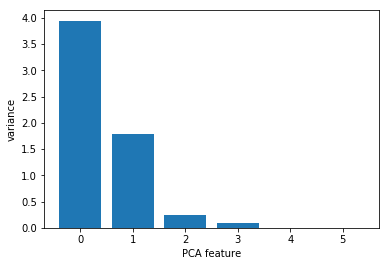

In [6]:
# Perform the necessary imports
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt

# Create scaler: scaler
scaler = StandardScaler()

# Create a PCA instance: pca
pca = PCA()

# Create pipeline: pipeline
pipeline = make_pipeline(scaler, pca)

# Fit the pipeline to 'samples'
pipeline.fit(samples)

# Plot the explained variances
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_)
plt.xlabel('PCA feature')
plt.ylabel('variance')
plt.xticks(features)
plt.show()

This shows PCA features 0 and 1 have significant variance, indicating an intrinsic dimension of the dataset reduced to 2.

In [9]:
# Perform the necessary imports
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt

# Create scaler: scaler
scaler = StandardScaler()

# Create a PCA instance: pca
pca = PCA(n_components=2)

# Create pipeline: pipeline
pipeline = make_pipeline(scaler, pca)

# Fit the pipeline to 'samples'
pipeline.fit(samples)
pca_features = pipeline.transform(samples)
print(pca_features.shape)

(85, 2)
